# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.73532332 2.43517568 2.21930426 2.37715864 2.65791016 2.83046658
 2.58086573 2.9516608  2.56390368 2.11112645]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `ceiling` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

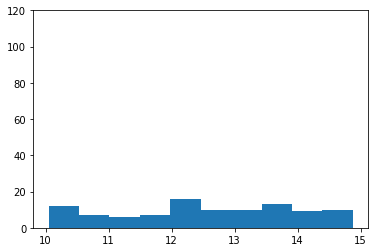

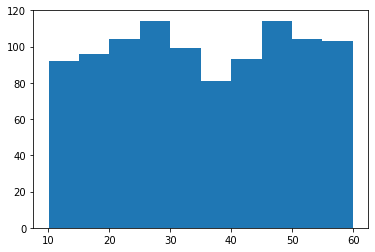

In [2]:
# your code here

# import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# define function
def uni_dist(bottom, ceiling, count):
    return bottom + (ceiling-bottom) * uniform.rvs(size=count)

# apply function to first set of parameters
first_dist = uni_dist(10, 15, 100)

# apply function to second set of parameters
second_dist = uni_dist(10, 60, 1000)

# define first plot
plt.hist(first_dist, bins=10)

plt.ylim([0, 120])

# display plot
plt.show()

# define second plot
plt.hist(second_dist, bins=10)

plt.ylim([0, 120])

# display plot
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:

# In the first distribution the 100 values are between 10 and 15 and in the second there are 1000 values between 10 and 60


## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

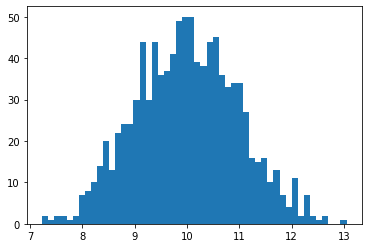

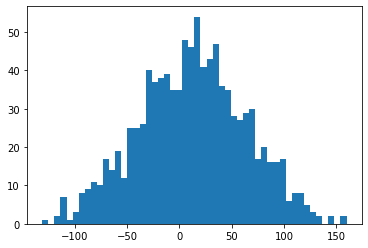

In [5]:
# your code here

# define function
def norm_dist(mu, sigma, count):
    return mu + sigma * np.random.randn(count)

# first normal distribution
norm_dist1 = norm_dist(10, 1, 1000)

# second normal distribution
norm_dist2 = norm_dist(10, 50, 1000)

# plot first dist
plt.hist(norm_dist1, bins=50)

# show plot
plt.show()

# plot first dist
plt.hist(norm_dist2, bins=50)

# show plot
plt.show()


How are the two distributions different?

In [ ]:
# your answer here:

# For the second distribution, which has a greater standard deviation, the values are more dispersed, from -150 to 150.


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [7]:
# your code here

# import pandas
import pandas as pd

# read data
vehicles = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-probability-distributions/your-code/vehicles.csv")

# check data
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


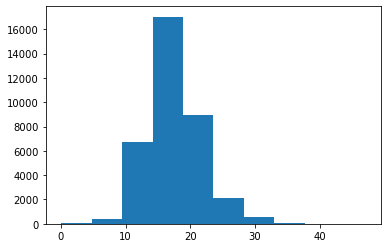

In [8]:
#plot fuel barrels per year
plt.hist(vehicles["Fuel Barrels/Year"])

# show plot
plt.show()

2. CO2 Emission Grams/Mile 

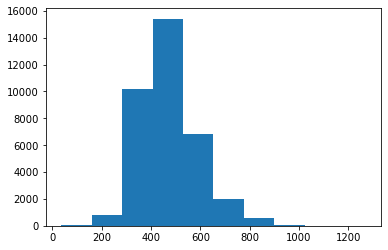

In [9]:
# your code here

#plot fuel barrels per year
plt.hist(vehicles["CO2 Emission Grams/Mile"])

# show plot
plt.show()


3. Combined MPG

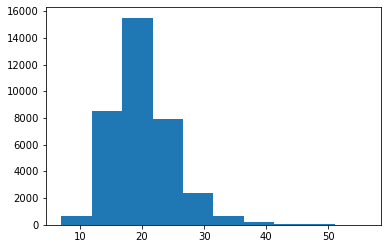

In [10]:
# your code here


#plot fuel barrels per year
plt.hist(vehicles["Combined MPG"])

# show plot
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [11]:
# you answer here:

# We can look at the histograms and see if they have a bellshaped curve. If they do, they are more or less normally distributed. 

# There is also the Shapiro Wilkinson test of normality

# import shapiro wilkinson test
from scipy.stats import shapiro

# define data
data_list = [vehicles["Fuel Barrels/Year"], vehicles["CO2 Emission Grams/Mile"], vehicles["Combined MPG"]]


for data in data_list:
    # apply test
    stat, p = shapiro(data)

    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret test
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

# The conclusion is that the data diverges significantly from the normal distribution at a signficance level of 0.05

Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.947, p=0.000
Sample does not look Gaussian (reject H0)


/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

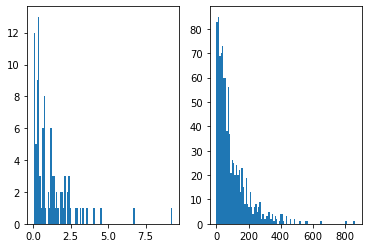

In [43]:
# your code here

def exp_dist(size, scale=10):
    
    return np.random.exponential(scale, size)

# first dsitribution
first_dist = exp_dist(100, 1)

# second distribution
second_dist = exp_dist(1000,100)

# define subplots
plot_options, (chart1, chart2) = plt.subplots(nrows=1, ncols=2)

chart1.hist(first_dist, bins=100)

chart2.hist(second_dist, bins=100)

# show plot
plt.show()


How are the two distributions different?

In [ ]:
# your answer here:

# In the first dist it is around the mean of 1 and the second around the mean of 100. 


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [35]:
# your answer here
# Hint: This is same as saying P(x<15)

# library
from scipy.stats import expon

# define inverse of lambda 1/10 inverted = 10
lambda_inverse = 10

# get exponential distribution
exp_dist = expon(scale=lambda_inverse)

# Use the comulative distribution function of less than 15
exp_dist.cdf(14.9999)


0.7768676085388121

What is the probability that the customer will spend more than 15 minutes

In [36]:
# your answer here

# the complement of the cumulative probability of less than 15 
1 - exp_dist.cdf(14.9999)

# or use the safe function
exp_dist.sf(15)
 

0.22313016014842982